>### Classification
 analysis and predecting | heart.csv |

In [1]:
#import LIBS
#==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

>### data description

In [2]:
#Read heart.scv 
#===============
data = pd.read_csv('heart.csv');data
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


>### unique values defferences
>### There are differences between data unique values on features  age, trtbps , chol , thalachh, old peak , those of them mor than 5 

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


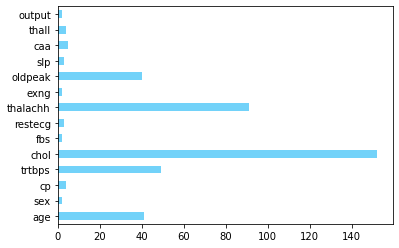

In [3]:
data.nunique().plot(kind='barh',color='#72d2f9')
print(data.nunique())

-------------------------------------------------------------------------------------------------------------------------------------------

> ### Most frequent 
> ### Create some visualizations and print some information about features distribution and Frequencies

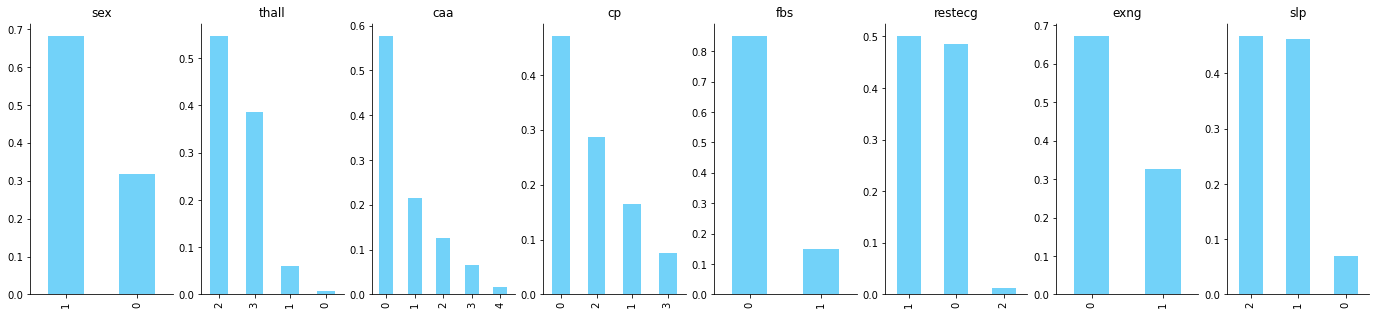

In [9]:
# drawing Classified features and numerical features
#===================================================
c_feaures = ['sex','thall','caa','cp','fbs','restecg','exng','slp']
n_feaures = ["age","trtbps","chol","thalachh","oldpeak"]

#Frequencies of Classified features
fig, axes = plt.subplots(1, 8, figsize=(24, 5))
for i, c in enumerate(c_feaures):
     data[c].value_counts(normalize=True).plot(kind = 'bar',color=['#72d2f9'],
                                 ax=axes[i], title = c, fontsize=10)
     axes[i].spines['right'].set_color('White')
     axes[i].spines['top'].set_color('White') 

| feature | result                                                                                             |
|-------  |----------------------------------------------------------------------------------------------------|                                 
| sex     | approximately 70% are men                                                                          |
| thall   | approximately 55% are 2 ??                                                                         | 
| caa     | approximately 55% = 0  numer of major vessel                                                       |   
| cp      | approximately {50% : asymptomatic , 30% : atypical angina, 15% : typical angina , 8% = non_anginal}|  
| fbc     | nearly 15 % of the fbs value have fasting blood sugar > 120 mg/dl                                  |
| restecg | nearby 50 % of the sample have resting electrocardiographic results normal                         |
| exng    | 35 %  Exercise induced angina                                                                      |
| slp     | approximately 49% = 2                                                                              |


<AxesSubplot:title={'center':'oldpeak'}, ylabel='Frequency'>

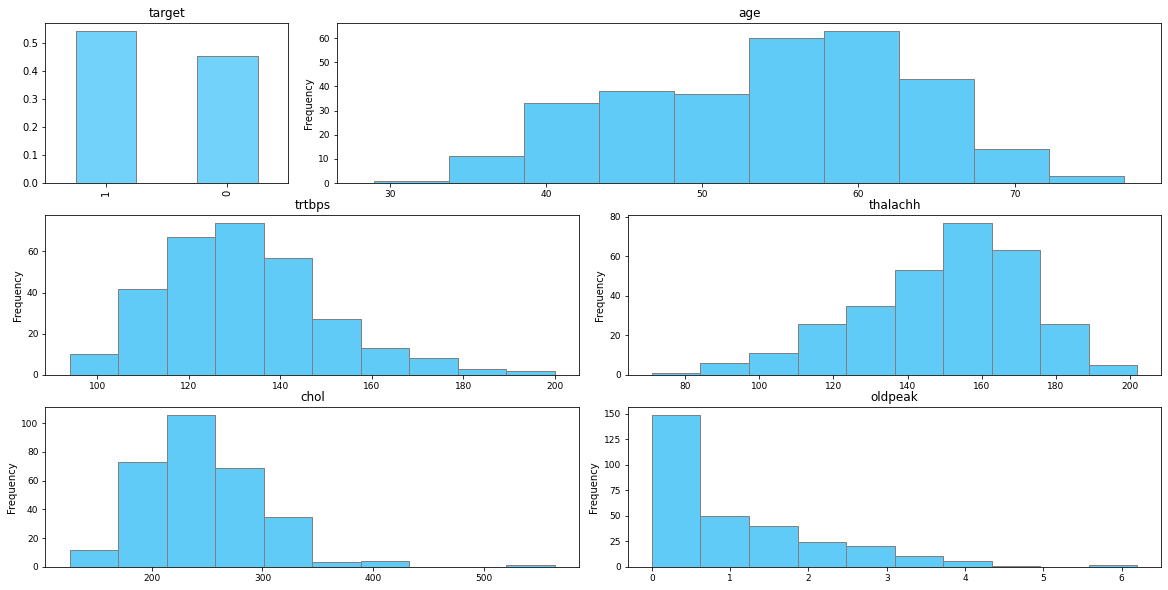

In [5]:
#Frequencies of "age","trtbps","chol","thalachh","oldpeak","target"
#=================================================================
n_feaures = ["age","trtbps","chol","thalachh","oldpeak","target"]
fig = plt.figure(figsize=(20, 10))
gs = mpl.gridspec.GridSpec(3, 4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1:])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[1, 2:])
ax4 = fig.add_subplot(gs[2, 0:2])
ax5 = fig.add_subplot(gs[2, 2:])


data['output'].value_counts(normalize=True).plot.bar(color=['#72d2f9'], ax=ax0, title='target',edgecolor='gray')
data['age'].plot(kind='hist', color='#60cbf7', ax=ax1, title = 'age', fontsize=9, edgecolor='gray')
data['trtbps'].plot(kind='hist', color='#60cbf7', ax=ax2, title = 'trtbps', fontsize=9, edgecolor='gray')
data['thalachh'].plot(kind='hist', color='#60cbf7', ax=ax3, title = 'thalachh', fontsize=9, edgecolor='gray')
data['chol'].plot(kind='hist', color='#60cbf7', ax=ax4, title = 'chol', fontsize=9, edgecolor='gray')
data['oldpeak'].plot(kind='hist', color='#60cbf7', ax=ax5, title = 'oldpeak', fontsize=9, edgecolor='gray')


| feature | result                                                                                             |
|-------  |----------------------------------------------------------------------------------------------------|                                
| Target  |  approximately 58% have high attack heart                                                          |
| age     |  most of frequency with the age than 50                                                            |                      
| trtbps  |  resting blood pressure : 70% have (120-140)                                                       |
| thalach |  maximum heart rate  achived                                                                       | 
| chol    |  cholestrol in mg/dl fetched via BMI sensor  :chol200-300                                          | 
| old peak|  ST depresseion induced by exersise relative to rest                                               | 


-------------------------------------------------------------------------------------------------------------------------------------------

> ###  corolation 

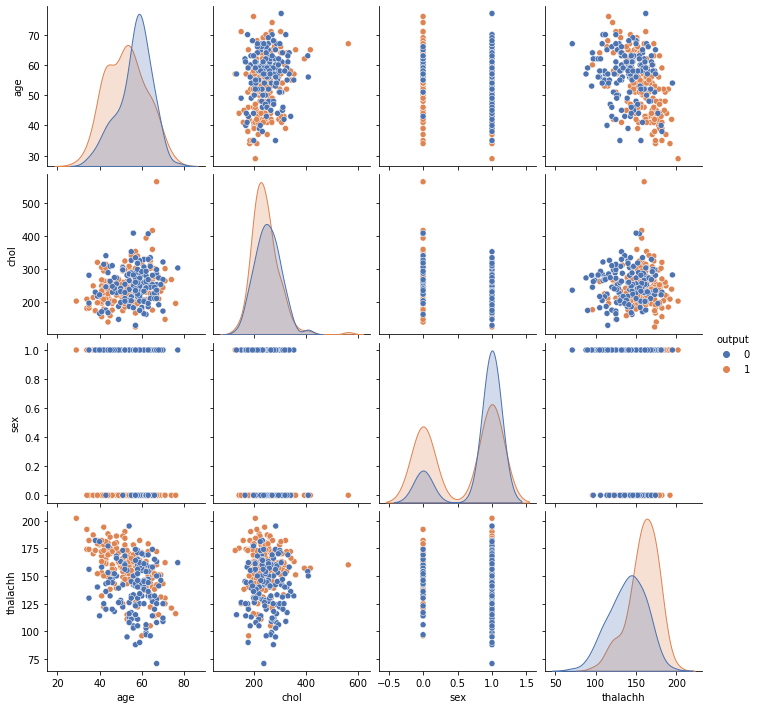

In [10]:
#corrolation 
#===========
c_feaures = ['sex','thall','caa','cp','fbs','restecg','exng','slp']
n_feaures = ["age","trtbps","chol","thalachh","oldpeak"]
# sns.pairplot(data, hue ='output')
#sns.pairplot(data[['sex','thall','caa','cp','fbs','restecg','exng','slp','output']], hue ='output') ؟؟؟؟
sns.pairplot(data[["age","chol",'sex',"thalachh",'output']], hue ='output' ,palette = 'deep')

-------------------------------------------------------------------------------------------------------------------------------------------

> ### checking features related

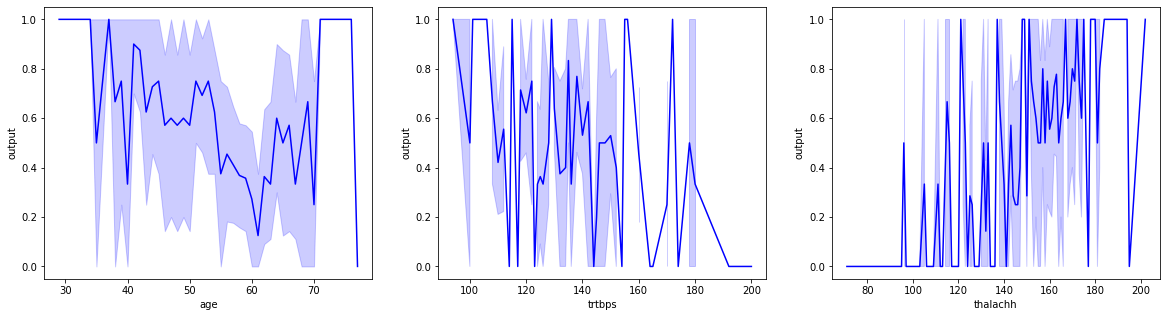

In [11]:
#sns.factorplot(x=data['age'],y=data['output'],data=data, color ='blue')
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
n_feaures = ["age","trtbps","thalachh"]
for i ,n in enumerate(n_feaures):
    sns.lineplot(x=data[n],y=data['output'],data=data, color ='blue',ax=axes[i] )


| feature                    | result                                                                                             |
|-------                     |----------------------------------------------------------------------------------------------------|                                
| Effect of age on Target      |  axes[0] shows that younger people have more chances to get heart attacks than older people !!!!!! |
|                              |  it shows that people who are between the ages of 34-37 more likely to have a heart attack         |  
| Effect of trtbps on Target   |  axes[1] shows that people who have resting blood pressure ????????AJIIB BOOD                      |      
| Effect of thalachh on Target |  axes[2] shows that people who have high heart rate achived,  more to get high attack              |


-------------------------------------------------------------------------------------------------------------------------------------------

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

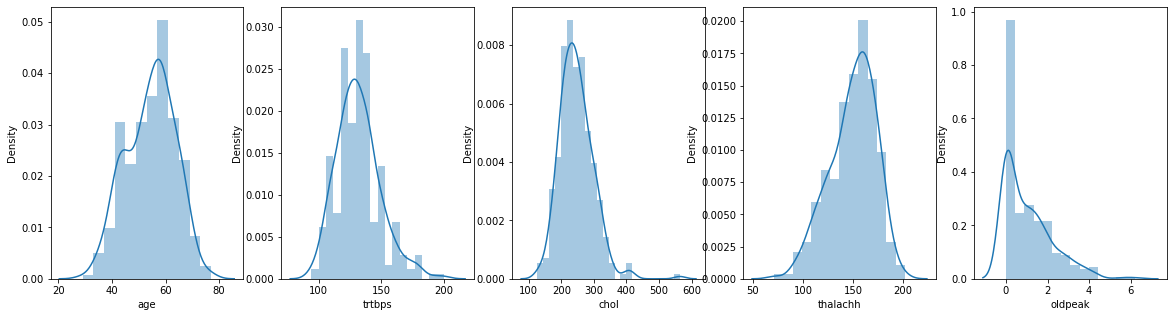

In [10]:
#displot
fig, axes = plt.subplots(1,5, figsize=(20, 5))
n_feaures = ["age","trtbps","chol","thalachh","oldpeak"]
for i ,n in enumerate(n_feaures):
     sns.distplot(data[n] , ax=axes[i])

-------------------------------------------------------------------------------------------------------------------------------------------

>### checking (age , trtbps) (age , chol ) (age ,thalachh) (age , oldpeak)

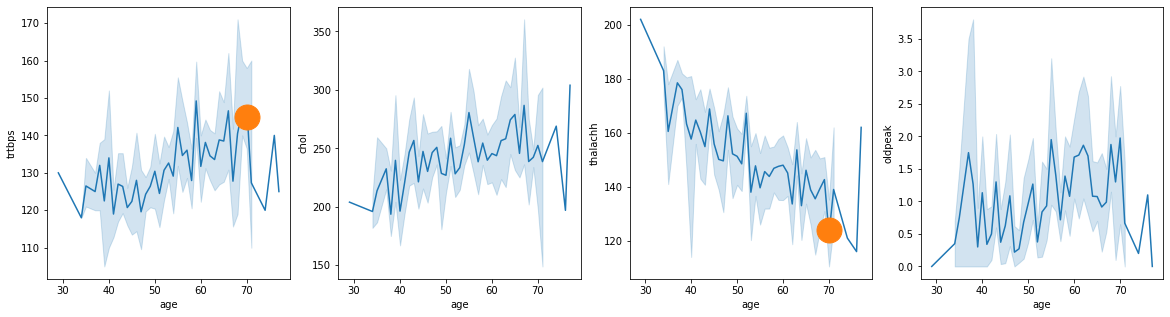

In [11]:
fig, axes = plt.subplots(1,4, figsize=(20, 5))
n_feaures = ["trtbps","chol","thalachh","oldpeak" ]
for i ,n in enumerate(n_feaures):
    sns.lineplot(x = data['age'] , y = data[n] , ax=axes[i])
    
axes[0].plot(70,145, "o", markersize=25)
axes[2].plot(70,124, "o", markersize=25)   

| feature                      | result                                                                                             |
|-------                       |----------------------------------------------------------------------------------------------------|                                
| (age , chol )                |  axes[age , chol] shows that "Cholesterol" level increasing  in higher ages                        |       
| (age , trtbps)               |  axes[age , trtbps] shows " maximum heart rate  achived " level decreasing  in higher ages         |          



-------------------------------------------------------------------------------------------------------------------------------------------

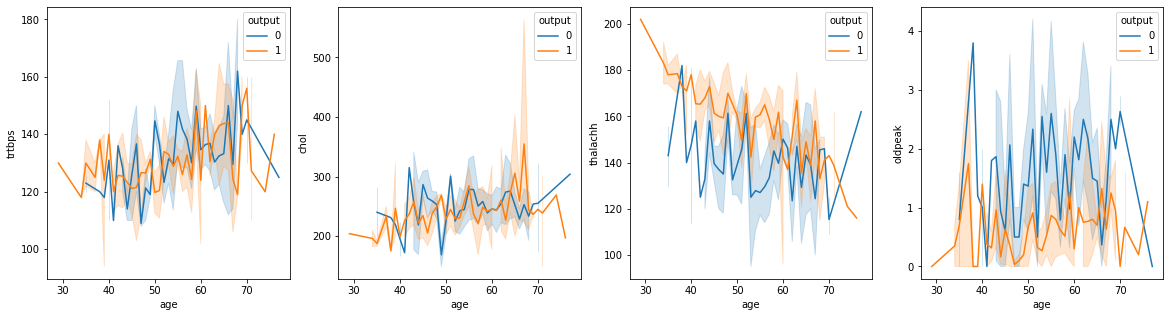

In [12]:
fig, axes = plt.subplots(1,4, figsize=(20, 5))
n_feaures = ["trtbps","chol","thalachh","oldpeak" ]
for i ,n in enumerate(n_feaures):
    sns.lineplot(x = data['age'] , y = data[n] , ax=axes[i], hue=data['output'])
    
# to increse age and cholosterol have more heart attack    

-------------------------------------------------------------------------------------------------------------------------------------------      

>###  predict and use of KNN 

In [13]:
data2 = data.drop(['output'],axis=1);data2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


>###Train_ test_split

In [15]:
# Train-test-split
#=================
X_train, X_test, y_train, y_test = train_test_split( data2.to_numpy(), data['output'], random_state=10)
print( data2.columns , X_train.shape , X_test.shape , y_train.shape , y_test.shape  )

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object') (227, 13) (76, 13) (227,) (76,)


In [16]:
#The dimension and feature names is as below:
print(" feature name : {} \n x_train shapes : {}\n x_test shapes : {}\n y_train shapes : {} \n y_test shapes : {}" .format (
                                data2.columns, X_train.shape, X_test.shape, y_train.shape, y_test.shape ))

 feature name : Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object') 
 x_train shapes : (227, 13)
 x_test shapes : (76, 13)
 y_train shapes : (227,) 
 y_test shapes : (76,)


In [33]:
#knn
heart_knn_cl = KNeighborsClassifier(n_neighbors=1)

In [34]:
#fit
heart_knn_cl.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
#predict
heart_knn_cl.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [36]:
#test score and train score
print(" train score  : {} \n test score : {}\n " .format ( heart_knn_cl.score(X_train, y_train), heart_knn_cl.score(X_test, y_test)))

 train score  : 1.0 
 test score : 0.6447368421052632
 


In [37]:
# plot test accuracy , train accuracy
k_neighbors = range(1, 10)

heart_train_acc = []
heart_test_acc = []
for k in k_neighbors:
    heart_knn_cl = KNeighborsClassifier(n_neighbors=k)
    heart_knn_cl.fit(X_train, y_train)
    heart_train_acc.append(heart_knn_cl.score(X_train, y_train))
    heart_test_acc.append(heart_knn_cl.score(X_test, y_test))
    

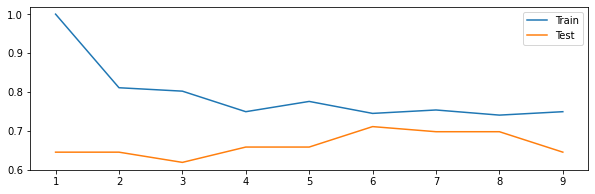

In [38]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(k_neighbors,  heart_train_acc, label='Train')
ax.plot(k_neighbors,  heart_test_acc, label='Test')
plt.legend()

In [39]:
train_test_accuracy = pd.DataFrame ([heart_train_acc ,heart_test_acc] , index= ['train_accuracy' , 'test_accuracy']);train_test_accuracy
train_test_accuracy['mean_accuracy'] = train_test_accuracy.mean(1)
train_test_accuracy

,0,1,2,3,4,5,6,7,8,mean_accuracy
train_accuracy,1.000000,0.810573,0.801762,0.748899,0.775330,0.744493,0.753304,0.740088,0.748899,0.791483
test_accuracy,0.644737,0.644737,0.618421,0.657895,0.657895,0.710526,0.697368,0.697368,0.644737,0.663743


<AxesSubplot:>

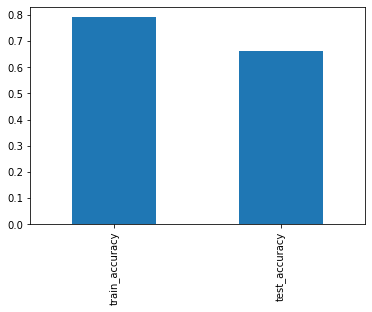

In [40]:
train_test_accuracy.mean(1).plot(kind='bar')